In [145]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics, cluster

pd.options.mode.chained_assignment = None  # default='warn'

In [146]:
# confirm directory of all files with summons data
os.listdir('summons_data')

['2019_01mv-en-us-066sum.xlsx',
 '2019_04mv-en-us-106sum.xlsx',
 '2019_01mv-en-us-076sum.xlsx',
 '2019_05mv-en-us-041sum.xlsx',
 '2019_06mv-en-us-077sum.xlsx',
 '2019_02mv-en-us-040sum.xlsx',
 '2019_07mv-en-us-120sum.xlsx',
 '2019_07mv-en-us-048sum.xlsx',
 '2019_03mv-en-us-107sum.xlsx',
 '2019_06mv-en-us-067sum.xlsx',
 '2019_02mv-en-us-050sum.xlsx',
 '2019_02mv-en-us-022sum.xlsx',
 '2019_06mv-en-us-005sum.xlsx',
 '2019_02mv-en-us-032sum.xlsx',
 '2019_07mv-en-us-083sum.xlsx',
 '2019_05mv-en-us-033sum.xlsx',
 '2019_01mv-en-us-014sum.xlsx',
 '2019_05mv-en-us-023sum.xlsx',
 '2019_02mv-en-us-107sum.xlsx',
 '2019_03mv-en-us-050sum.xlsx',
 '2019_07mv-en-us-067sum.xlsx',
 '2019_06mv-en-us-048sum.xlsx',
 '2019_03mv-en-us-040sum.xlsx',
 '2019_07mv-en-us-077sum.xlsx',
 '2019_06mv-en-us-120sum.xlsx',
 '2019_01mv-en-us-121sum.xlsx',
 '2019_04mv-en-us-041sum.xlsx',
 '2019_01mv-en-us-049sum.xlsx',
 '2019_05mv-en-us-106sum.xlsx',
 '2019_04mv-en-us-023sum.xlsx',
 '2019_04mv-en-us-033sum.xlsx',
 '2019_0

In [147]:
files = sorted(os.listdir('summons_data'), reverse=True)

In [148]:
# create dataframe, read in all excel files via loop, clean up
df = pd.DataFrame()
pd.set_option('display.max_columns', None)

for file in files:
    filename = 'summons_data/'+file
    tdf = pd.read_excel(filename)
    PCT = tdf.iloc[0,0] 
    Month = tdf.iloc[1,0]
    tdf = tdf.iloc[3:-2,:2]
    tdf = tdf.rename(columns={"Moving Violations": "Offense Description", "Unnamed: 1":Month +" "+ PCT})
    tdf.set_index('Offense Description', inplace = True)
    df = pd.concat([tdf,df], axis=1)

In [149]:
dfT = df.T # transpose chart

In [150]:
dfT = dfT.fillna(0) # fill NaN's to avoid coversion of int to float

In [151]:
# columns are different types of summons and # of and type of people injured/killed
# rows are each precint + each month for 2019 YTD

dfT = dfT.sort_index(ascending=True)
dfT = dfT.rename_axis('PCT_Month') # rename index
dfT[20:70]

,Backing Unsafely,Bike Lane,Bus Lane,Cell Phone,Commercial Veh on Pkwy,Cruising For Passengers,Disobey Traffic Control Device,Driving Too Slow,Equipment,Equipment (Other),Excessive Noise,Fail to Keep Right,Fail to yield Right of Way to Pedestrian,Failure to Signal,Failure to yield Right of Way to Vehicle,Following Too Closely,Improper Passing,Improper Taxi Pickup,Improper Turn,Improper/Missing Plates,Lamps and Other Equipment on Bicycle,Motorcycle (Other),Not Giving R of W to Veh.,Obstructed Plate,One Way Street,Other Movers,Overheight,Overlength,Overweight,Overwidth,Pavement Markings,Red Light,School Bus,Scooter In NYC,Seat Belt,Speeding,Spillback,TBTA Rule,TLC (Other),Tints,Truck Route,Uninspected,Uninsured,Unlicensed Operator,Unregistered,Unsafe Lane Change
PCT_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April 123rd Precinct,0,0,0,42,0,0,182,1,7,0,0,0,16,24,0,2,0,0,5,0,0,0,5,9,2,120,0,0,0,0,0,55,0,0,78,242,0,0,0,42,0,7,20,56,13,2
April 13th Precinct,2,1,5,16,0,0,232,0,20,0,0,1,43,1,0,0,1,4,216,0,1,3,0,1,14,38,0,0,0,0,0,110,0,0,11,12,1,0,0,20,0,1,6,6,1,0
April 17th Precinct,0,1,2,3,0,0,100,0,3,0,0,0,75,30,0,0,0,0,158,1,0,5,0,1,32,31,0,0,0,0,0,52,0,0,8,60,0,0,0,6,0,1,2,9,0,4
April 19th Precinct,0,0,1,13,0,0,257,0,8,0,0,0,48,2,0,0,0,1,513,0,0,2,0,6,5,36,0,0,0,0,0,119,2,0,12,53,0,0,0,1,6,1,3,24,2,3
April 1st Precinct,0,0,5,36,0,0,61,0,3,0,0,0,28,2,0,0,0,1,11,10,0,4,1,0,25,95,0,0,0,0,0,43,0,0,43,14,0,0,0,4,0,0,0,1,0,0
April 20th Precinct,0,0,1,32,0,0,196,0,7,0,0,0,16,1,0,0,1,0,111,0,0,0,0,2,4,49,0,0,0,0,0,94,1,0,12,108,0,0,4,0,1,0,2,10,1,1
April 23rd Precinct,2,0,10,47,0,0,99,0,10,0,0,0,75,4,0,1,2,0,132,0,0,0,0,3,3,38,0,0,0,0,0,117,1,0,32,57,1,1,0,31,0,1,4,12,3,1
April 24th Precinct,1,0,0,10,0,0,118,0,47,0,0,0,150,8,0,0,1,0,193,0,0,2,0,10,3,46,0,0,0,0,0,171,0,0,32,114,0,0,0,6,0,1,6,24,2,1
April 25th Precinct,1,0,13,20,0,0,104,0,26,1,0,0,146,5,0,0,0,0,161,0,0,3,1,33,8,192,0,0,0,0,0,124,0,0,117,70,0,0,0,27,0,3,3,27,7,0


In [152]:
# Read in crash data for the same time period from NYC Open Data portal
# There was no precinct field so a spatial join (done in GIS) was needed to add the column

crash = pd.read_csv('crash3.csv')

In [153]:
crash = crash.fillna(0)
crash.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5,precinct
0,9/13/19,21:15,BROOKLYN,11215.0,40.671160,-73.971420,POINT (-73.97142 40.67116),0,0,18 PROSPECT PARK WEST,0,0,0,0,0,0,0,0,Unspecified,0,0,0,0,4206285,Sedan,0,0,0,0,78.0
1,9/13/19,11:20,0,0.0,40.803566,-73.967150,POINT (-73.96715 40.803566),WEST 109 STREET,0,0,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,0,0,0,4206266,Sedan,Sedan,0,0,0,24.0
2,9/13/19,14:13,MANHATTAN,10021.0,40.774720,-73.964400,POINT (-73.9644 40.77472),0,0,14 EAST 76 STREET,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,0,0,0,4205833,Station Wagon/Sport Utility Vehicle,Taxi,0,0,0,19.0
3,9/13/19,23:20,0,0.0,40.696033,-73.984530,POINT (-73.98453 40.696033),TILLARY STREET,0,0,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,0,0,0,4205869,Sedan,Sedan,0,0,0,84.0
4,9/13/19,12:40,0,0.0,40.843660,-73.920044,POINT (-73.920044 40.84366),SHAKESPEARE AVENUE,0,0,0,0,0,0,0,0,0,0,Unspecified,Unspecified,0,0,0,4205071,Station Wagon/Sport Utility Vehicle,Pick-up Truck,0,0,0,44.0


In [154]:
crash.count()

DATE                             135423
TIME                             135423
BOROUGH                          135423
ZIP_CODE                         135423
LATITUDE                         135423
LONGITUDE                        135423
LOCATION                         135423
ON_STREET_NAME                   135423
CROSS_STREET_NAME                135423
OFF_STREET_NAME                  135423
NUMBER_OF_PERSONS_INJURED        135423
NUMBER_OF_PERSONS_KILLED         135423
NUMBER_OF_PEDESTRIANS_INJURED    135423
NUMBER_OF_PEDESTRIANS_KILLED     135423
NUMBER_OF_CYCLIST_INJURED        135423
NUMBER_OF_CYCLIST_KILLED         135423
NUMBER_OF_MOTORIST_INJURED       135423
NUMBER_OF_MOTORIST_KILLED        135423
CONTRIBUTING_FACTOR_VEHICLE_1    135423
CONTRIBUTING_FACTOR_VEHICLE_2    135423
CONTRIBUTING_FACTOR_VEHICLE_3    135423
CONTRIBUTING_FACTOR_VEHICLE_4    135423
CONTRIBUTING_FACTOR_VEHICLE_5    135423
COLLISION_ID                     135423
VEHICLE_TYPE_CODE_1              135423


In [155]:
# Only select crash data needed for model
crash_filtered = crash[['DATE','precinct','NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED','NUMBER_OF_PEDESTRIANS_KILLED','NUMBER_OF_CYCLIST_INJURED','NUMBER_OF_CYCLIST_KILLED','NUMBER_OF_MOTORIST_INJURED','NUMBER_OF_MOTORIST_KILLED']]
crash_filtered['precinct'] = crash_filtered['precinct'].astype(int)
crash_filtered.head()

,DATE,precinct,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED
0,9/13/19,78,0,0,0,0,0,0,0,0
1,9/13/19,24,0,0,0,0,0,0,0,0
2,9/13/19,19,0,0,0,0,0,0,0,0
3,9/13/19,84,0,0,0,0,0,0,0,0
4,9/13/19,44,0,0,0,0,0,0,0,0


In [156]:
# Convert date field to datetime
crash_filtered['DATE'] = pd.to_datetime(crash_filtered.DATE) # convert date field to datetime
crash_filtered['MONTH'] = crash_filtered.DATE.dt.month#.astype(int) # create column with month data

# Rename months
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September'}
crash_filtered['MONTH'] = crash_filtered['MONTH'].map(months)

In [157]:
crash_filtered.dtypes

DATE                             datetime64[ns]
precinct                                  int64
NUMBER_OF_PERSONS_INJURED                 int64
NUMBER_OF_PERSONS_KILLED                  int64
NUMBER_OF_PEDESTRIANS_INJURED             int64
NUMBER_OF_PEDESTRIANS_KILLED              int64
NUMBER_OF_CYCLIST_INJURED                 int64
NUMBER_OF_CYCLIST_KILLED                  int64
NUMBER_OF_MOTORIST_INJURED                int64
NUMBER_OF_MOTORIST_KILLED                 int64
MONTH                                    object
dtype: object

In [158]:
crash_filtered.head()

,DATE,precinct,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,MONTH
0,2019-09-13,78,0,0,0,0,0,0,0,0,September
1,2019-09-13,24,0,0,0,0,0,0,0,0,September
2,2019-09-13,19,0,0,0,0,0,0,0,0,September
3,2019-09-13,84,0,0,0,0,0,0,0,0,September
4,2019-09-13,44,0,0,0,0,0,0,0,0,September


In [159]:
# Rename precincts to match fields in excel import
precincts = {
    1: '1st Precinct',
    5: '5th Precinct',
    6: '6th Precinct',
    7: '7th Precinct',
    9: '9th Precinct',
    10: '10th Precinct',
    13: '13th Precinct',
    14: '14th Precinct',
    17: '17th Precinct',
    18: '18th Precinct',
    19: '19th Precinct',
    20: '20th Precinct',
    22: '22nd Precinct',
    23: '23rd Precinct',
    24: '24th Precinct',
    25: '25th Precinct',
    28: '28th Precinct',
    30: '30th Precinct',
    32: '32nd Precinct',
    33: '33rd Precinct',
    34: '34th Precinct',
    40: '40th Precinct',
    41: '41st Precinct',
    42: '42nd Precinct',
    43: '43rd Precinct',
    44: '44th Precinct',
    45: '45th Precinct',
    46: '46th Precinct',
    47: '47th Precinct',
    48: '48th Precinct',
    49: '49th Precinct',
    50: '50th Precinct',
    52: '52nd Precinct',
    60: '60th Precinct',
    61: '61st Precinct',
    62: '62nd Precinct',
    63: '63rd Precinct',
    66: '66th Precinct',
    67: '67th Precinct',
    68: '68th Precinct',
    69: '69th Precinct',
    70: '70th Precinct',
    71: '71st Precinct',
    72: '72nd Precinct',
    73: '73rd Precinct',
    75: '75th Precinct',
    76: '76th Precinct',
    77: '77th Precinct',
    78: '78th Precinct',
    79: '79th Precinct', 
    81: '81st Precinct',
    83: '83rd Precinct',
    84: '84th Precinct',
    88: '88th Precinct',
    90: '90th Precinct',
    94: '94th Precinct',
    100: '100th Precinct',
    101: '101st Precinct',
    102: '102nd Precinct',
    103: '103rd Precinct',
    104: '104th Precinct',
    105: '105th Precinct',
    106: '106th Precinct',
    107: '107th Precinct',
    108: '108th Precinct',
    109: '109th Precinct',
    110: '110th Precinct',
    111: '111th Precinct',
    112: '112th Precinct',
    113: '113th Precinct',
    114: '114th Precinct',
    115: '115th Precinct',
    120: '120th Precinct',
    121: '121st Precinct',
    122: '122nd Precinct',
    123: '123rd Precinct'  
}
crash_filtered['precinct'] = crash_filtered['precinct'].map(precincts)

In [160]:
crash_filtered['precinct'].value_counts()

105th Precinct    4489
109th Precinct    4234
75th Precinct     4148
108th Precinct    3234
113th Precinct    3054
114th Precinct    3049
107th Precinct    2835
106th Precinct    2686
104th Precinct    2630
110th Precinct    2560
47th Precinct     2553
111th Precinct    2533
102nd Precinct    2530
67th Precinct     2506
19th Precinct     2457
40th Precinct     2424
43rd Precinct     2417
90th Precinct     2364
103rd Precinct    2185
18th Precinct     2170
44th Precinct     2161
115th Precinct    2136
61st Precinct     2080
72nd Precinct     2067
70th Precinct     2060
62nd Precinct     2052
52nd Precinct     2011
1st Precinct      1989
66th Precinct     1969
63rd Precinct     1929
                  ... 
69th Precinct     1448
48th Precinct     1431
78th Precinct     1386
94th Precinct     1377
77th Precinct     1340
122nd Precinct    1312
50th Precinct     1294
5th Precinct      1271
41st Precinct     1261
120th Precinct    1244
25th Precinct     1221
34th Precinct     1214
42nd Precin

In [161]:
crash_filtered['MONTH'].value_counts()

June         17824
July         16921
May          16613
March        16314
August       15721
January      15444
April        15377
February     14744
September     6465
Name: MONTH, dtype: int64

In [162]:
# Clean Precinct column
crash_filtered['PCT_Month'] = crash_filtered.MONTH + " " + crash_filtered.precinct
crash_filtered['PCT_Month'] = crash_filtered['PCT_Month'].str.strip()
crash_filtered.head()

,DATE,precinct,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,MONTH,PCT_Month
0,2019-09-13,78th Precinct,0,0,0,0,0,0,0,0,September,September 78th Precinct
1,2019-09-13,24th Precinct,0,0,0,0,0,0,0,0,September,September 24th Precinct
2,2019-09-13,19th Precinct,0,0,0,0,0,0,0,0,September,September 19th Precinct
3,2019-09-13,84th Precinct,0,0,0,0,0,0,0,0,September,September 84th Precinct
4,2019-09-13,44th Precinct,0,0,0,0,0,0,0,0,September,September 44th Precinct


In [163]:
crash_filtered_g = crash_filtered.groupby(by='PCT_Month').sum()
crash_filtered_g = crash_filtered_g.sort_index(ascending=True)
crash_filtered_g.head()

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED
PCT_Month,,,,,,,,
April 100th Precinct,24,0,4,0,2,0,18,0
April 101st Precinct,19,1,7,1,3,0,9,0
April 102nd Precinct,72,0,16,0,3,0,53,0
April 103rd Precinct,86,0,14,0,5,0,67,0
April 104th Precinct,82,0,13,0,6,0,63,0


In [164]:
# Look at some stats
dfT.describe()

,Backing Unsafely,Bike Lane,Bus Lane,Cell Phone,Commercial Veh on Pkwy,Cruising For Passengers,Disobey Traffic Control Device,Driving Too Slow,Equipment,Equipment (Other),Excessive Noise,Fail to Keep Right,Fail to yield Right of Way to Pedestrian,Failure to Signal,Failure to yield Right of Way to Vehicle,Following Too Closely,Improper Passing,Improper Taxi Pickup,Improper Turn,Improper/Missing Plates,Lamps and Other Equipment on Bicycle,Motorcycle (Other),Not Giving R of W to Veh.,Obstructed Plate,One Way Street,Other Movers,Overheight,Overlength,Overweight,Overwidth,Pavement Markings,Red Light,School Bus,Scooter In NYC,Seat Belt,Speeding,Spillback,TBTA Rule,TLC (Other),Tints,Truck Route,Uninspected,Uninsured,Unlicensed Operator,Unregistered,Unsafe Lane Change
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.0,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.760223,1.548327,3.797398,41.788104,0.284387,0.014870,189.418216,0.026022,23.576208,0.076208,0.001859,0.107807,63.641264,16.314126,0.085502,0.291822,2.392193,0.267658,81.570632,1.150558,0.143123,1.423792,1.234201,7.929368,4.289963,86.143123,0.003717,0.005576,0.001859,0.0,0.215613,77.224907,2.358736,0.083643,72.449814,77.544610,0.596654,0.003717,0.059480,38.117100,1.368030,2.328996,11.429368,48.881041,10.120818,2.628253
std,1.146664,5.663310,7.656367,24.084420,1.273925,0.148744,85.729218,0.191221,19.815037,0.375892,0.043113,0.365524,49.503978,21.618579,0.409539,0.694731,4.374091,0.946873,77.400742,1.748000,0.531992,2.950673,1.777414,8.221935,5.939604,51.233681,0.060914,0.074535,0.043113,0.0,0.658689,41.372266,4.253548,0.797150,52.934961,54.275753,1.176646,0.060914,0.654588,42.491923,3.895069,2.745156,10.519806,29.173864,9.673357,5.148385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,23.250000,0.000000,0.000000,130.000000,0.000000,9.000000,0.000000,0.000000,0.000000,29.000000,4.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.000000,46.000000,0.000000,0.000000,32.000000,37.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.000000,26.250000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,38.500000,0.000000,0.000000,178.000000,0.000000,18.000000,0.000000,0.000000,0.000000,51.000000,9.000000,0.000000,0.000000,1.000000,0.000000,61.000000,1.000000,0.000000,0.000000,1.000000,6.000000,3.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.000000,72.000000,1.000000,0.000000,59.000000,66.000000,0.000000,0.000000,0.000000,23.000000,0.000000,2.000000,8.000000,44.000000,7.000000,1.000000
75%,1.000000,1.000000,5.000000,54.750000,0.000000,0.000000,235.750000,0.000000,32.000000,0.000000,0.000000,0.000000,82.000000,19.000000,0.000000,0.000000,3.000000,0.000000,114.750000,2.000000,0.000000,2.000000,2.000000,10.000000,5.000000,113.000000,0.000000,0.000000,0.000000,0.0,0.000000,103.000000,3.000000,0.000000,105.750000,104.000000,1.000000,0.000000,0.000000,53.000000,1.000000,4.000000,17.000000,67.000000,14.000000,3.000000
max,9.000000,94.000000,66.000000,135.000000,17.000000,2.000000,577.000000,3.000000,116.000000,5.000000,1.000000,4.000000,324.000000,158.000000,4.000000,7.000000,55.000000,8

In [165]:
dfT.shape

(538, 46)

In [166]:
# Join the Summons and Crash tables
summons_crash = pd.concat([dfT,crash_filtered_g], join='inner', axis=1)
summons_crash.head()

,Backing Unsafely,Bike Lane,Bus Lane,Cell Phone,Commercial Veh on Pkwy,Cruising For Passengers,Disobey Traffic Control Device,Driving Too Slow,Equipment,Equipment (Other),Excessive Noise,Fail to Keep Right,Fail to yield Right of Way to Pedestrian,Failure to Signal,Failure to yield Right of Way to Vehicle,Following Too Closely,Improper Passing,Improper Taxi Pickup,Improper Turn,Improper/Missing Plates,Lamps and Other Equipment on Bicycle,Motorcycle (Other),Not Giving R of W to Veh.,Obstructed Plate,One Way Street,Other Movers,Overheight,Overlength,Overweight,Overwidth,Pavement Markings,Red Light,School Bus,Scooter In NYC,Seat Belt,Speeding,Spillback,TBTA Rule,TLC (Other),Tints,Truck Route,Uninspected,Uninsured,Unlicensed Operator,Unregistered,Unsafe Lane Change,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED
PCT_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April 100th Precinct,0,0,0,31,0,0,111,0,10,0,0,0,10,10,0,1,8,0,7,0,0,0,0,8,7,82,0,0,0,0,0,53,4,0,15,74,1,0,0,12,0,3,7,37,7,4,24,0,4,0,2,0,18,0
April 101st Precinct,0,1,0,19,0,0,105,1,12,0,0,0,10,4,0,0,3,0,43,0,0,0,0,6,0,61,0,0,0,0,0,58,2,0,4,55,2,0,0,15,0,3,6,41,10,0,19,1,7,1,3,0,9,0
April 102nd Precinct,1,0,9,50,0,0,145,0,66,0,0,0,56,10,0,0,4,0,69,0,0,4,1,10,2,81,0,0,0,0,0,65,0,0,112,55,1,0,0,12,1,4,15,61,13,1,72,0,16,0,3,0,53,0
April 103rd Precinct,2,0,35,37,0,0,191,0,17,0,0,0,83,3,0,0,0,0,128,1,0,0,0,4,2,115,0,0,0,0,0,108,0,0,68,100,0,0,0,0,0,0,6,41,1,0,86,0,14,0,5,0,67,0
April 104th Precinct,2,3,2,54,0,0,188,0,43,0,0,1,102,5,0,0,1,0,22,1,0,0,0,19,0,108,0,0,0,0,0,80,0,0,80,170,5,0,0,100,9,8,22,98,28,0,82,0,13,0,6,0,63,0


In [167]:
# Look at chart and graph of correlations
summons_crash.corr()

,Backing Unsafely,Bike Lane,Bus Lane,Cell Phone,Commercial Veh on Pkwy,Cruising For Passengers,Disobey Traffic Control Device,Driving Too Slow,Equipment,Equipment (Other),Excessive Noise,Fail to Keep Right,Fail to yield Right of Way to Pedestrian,Failure to Signal,Failure to yield Right of Way to Vehicle,Following Too Closely,Improper Passing,Improper Taxi Pickup,Improper Turn,Improper/Missing Plates,Lamps and Other Equipment on Bicycle,Motorcycle (Other),Not Giving R of W to Veh.,Obstructed Plate,One Way Street,Other Movers,Overheight,Overlength,Overweight,Overwidth,Pavement Markings,Red Light,School Bus,Scooter In NYC,Seat Belt,Speeding,Spillback,TBTA Rule,TLC (Other),Tints,Truck Route,Uninspected,Uninsured,Unlicensed Operator,Unregistered,Unsafe Lane Change,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED
Backing Unsafely,1.000000,0.005377,0.054064,0.021493,-0.053190,-0.025234,0.258580,-0.085793,0.230689,-0.009763,0.046127,0.050558,0.027374,0.318351,0.003330,0.073429,0.046718,0.045190,0.016868,0.107685,-0.015411,0.030242,0.137406,0.301265,0.143950,0.062592,0.011498,-0.007889,-0.029882,NaN,0.138819,0.075153,0.146571,-0.002842,0.031668,-0.028685,0.168955,0.011498,-0.007913,0.241751,0.057911,0.096195,0.307281,0.237726,0.184358,0.091444,0.041336,-0.028740,0.158697,0.003146,0.012697,-0.040898,0.016562,-0.024628
Bike Lane,0.005377,1.000000,-0.001596,-0.137992,-0.047078,0.031501,-0.042010,0.000048,0.044815,0.001407,0.003891,-0.000837,-0.044936,-0.044446,0.053999,0.002569,0.209626,0.311640,0.011742,-0.030458,0.069344,0.068711,0.029453,0.021494,0.009217,0.005535,-0.016440,-0.015670,-0.003861,NaN,0.026354,-0.001161,-0.074008,-0.014013,-0.018850,-0.130964,0.108224,-0.016440,-0.012224,-0.010590,0.004040,-0.039029,-0.056761,-0.069755,-0.010870,0.018160,-0.030309,0.005780,-0.071543,-0.022501,0.250470,0.020124,-0.049781,0.020862
Bus Lane,0.054064,-0.001596,1.000000,-0.117434,-0.090157,-0.018961,0.108857,0.052970,0.039238,-0.048046,0.156151,-0.007621,0.213276,-0.071176,-0.016490,-0.033459,-0.025234,0.000413,0.035028,-0.017221,-0.043947,0.027705,0.007833,0.090313,-0.032348,0.025168,0.041628,0.042508,-0.020702,NaN,-0.034037,0.044144,-0.022690,-0.018506,0.022954,0.146665,0.098559,0.012420,-0.018786,-0.077776,0.011187,-0.036894,0.013992,0.039037,0.029222,-0.002293,-0.046323,0.027533,0.044514,0.064657,-0.031619,-0.054770,-0.055244,0.007050
Cell Phone,0.021493,-0.137992,-0.117434,1.000000,-0.063179,-0.048949,0.050745,-0.007492,0.125335,0.031848,-0.019949,-0.014094,0.055750,0.001013,-0.035096,0.034403,-0.066215,-0.198948,-0.257191,0.015381,0.040347,0.002812,0.027899,0.086700,-0.178832,0.451826,-0.023002,-0.047464,0.007803,NaN,-0.005590,-0.101368,0.123473,-0.044360,0.444524,0.175258,-0.133554,-0.013835,0.009380,0.024164,-0.049116,0.200187,0.140029,0.298743,0.173238,0.073270,0.194877,0.045245,0.149155,-0.014103,-0.021256,0.001231,0.191604,0.084408
Commercial Veh on Pkwy,-0.053190,-0.047078,-0.090157,-0.063179,1.000000,0.035437,0.030178,-0.024508,0.072079,0.189861,-0.010186,-0.023884,-0.044983,0.152938,-0.035070,0.082339,0.025226,-0.035665,-0.074052,0.040050,-0.040163,-0.034899,0.013956,-0.005451,-0.084363,-0.088237,-0.014420,0.021606,-0.010186,NaN,0.110459,0.040175,-0.023519,-0.024797,-0.039308,0.047979,0.004821,0.057679,-0.016999,0.001300,0.217797,0.105939,0.102394,0.118777,0.109202,-0.021893,0.114563,0.027666,0.024904,-0.007835,-0.037952,0.049369,0.126485,0.022979
Cruising For Passengers,-0.025234,0.031501,-0.018961,-0.048949,0.035437,1.000000,-0.037575,-0.014389,0.019315,-0.021450,-0.004557,0.039513,-0.088571,0.083952,0.008524,0.010608,0.051774,0.040758,-0.053238,0.045822,-0.027879,0.006124,-0.051588,0.008773,-0.035954,0.026226,-0.006450,-0.007908,-0.004557,NaN,0.080106,-0.039902,-0.010676,-0.011092,-0.067983,-0.021423,-0.030052,0.199153,-0.009605,0.002113,-0.033759,0.021304,0.011903

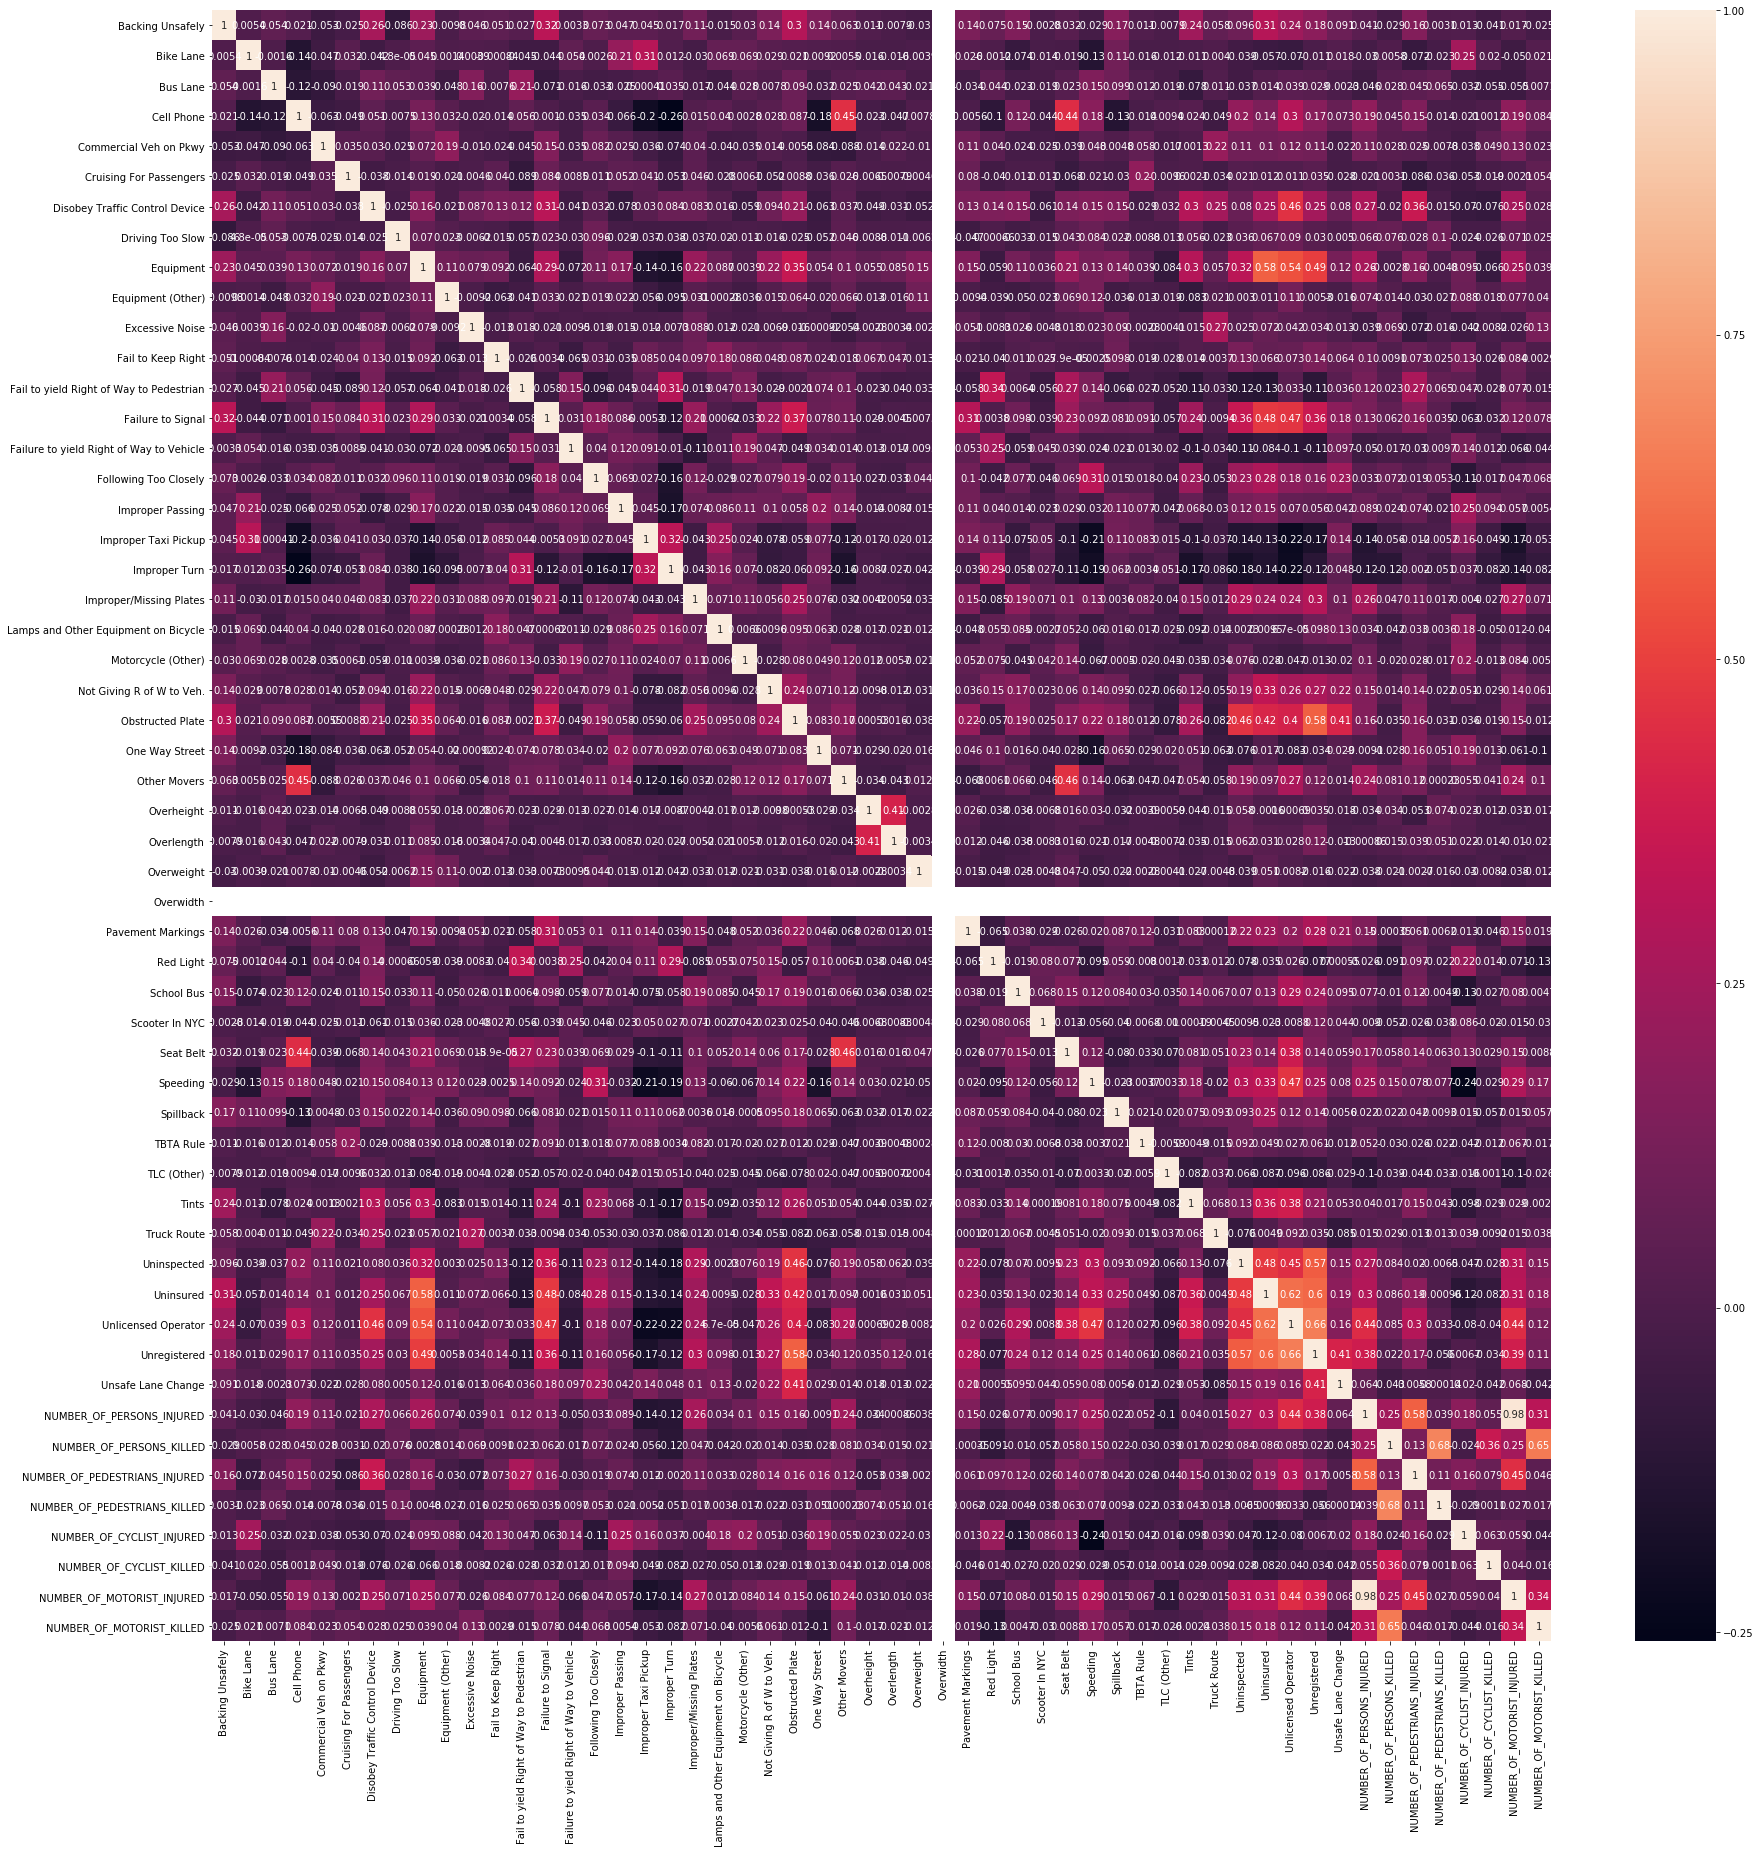

In [168]:
plt.figure(figsize = (30, 30))
sns.heatmap(summons_crash.corr(), annot = True)

In [169]:
# Plot features to look at distribution
features1 = ['Backing Unsafely','Bike Lane','Bus Lane','Cell Phone','Commercial Veh on Pkwy','Cruising For Passengers','Disobey Traffic Control Device','Failure to Signal','Failure to yield Right of Way to Vehicle','Tints','Truck Route','Uninspected','Uninsured','Unlicensed Operator','Unregistered','Unsafe Lane Change']
features2 = ['Driving Too Slow','Equipment','Equipment (Other)','Excessive Noise','Fail to Keep Right','Fail to yield Right of Way to Pedestrian','Red Light','School Bus','Scooter In NYC','Seat Belt','Speeding','Spillback','TBTA Rule','TLC (Other)']
features3 = ['Following Too Closely','Improper Passing','Improper Taxi Pickup','Improper Turn','Improper/Missing Plates','Lamps and Other Equipment on Bicycle','Motorcycle (Other)','Not Giving R of W to Veh.','Obstructed Plate','One Way Street','Other Movers','Overheight','Overlength','Overweight','Overwidth','Pavement Markings']

all_features = ['Backing Unsafely','Bike Lane','Bus Lane','Cell Phone','Commercial Veh on Pkwy','Cruising For Passengers',
                'Disobey Traffic Control Device','Failure to Signal','Failure to yield Right of Way to Vehicle','Tints',
                'Truck Route','Uninspected','Uninsured','Unlicensed Operator','Unregistered','Unsafe Lane Change',
                'Driving Too Slow','Equipment','Equipment (Other)','Excessive Noise','Fail to Keep Right',
                'Fail to yield Right of Way to Pedestrian','Red Light','School Bus','Scooter In NYC','Seat Belt','Speeding',
                'Spillback','TBTA Rule','TLC (Other)','Following Too Closely','Improper Passing','Improper Taxi Pickup',
                'Improper Turn','Improper/Missing Plates','Lamps and Other Equipment on Bicycle','Motorcycle (Other)',
                'Not Giving R of W to Veh.','Obstructed Plate','One Way Street','Other Movers','Overheight','Overlength',
                'Overweight','Overwidth','Pavement Markings']

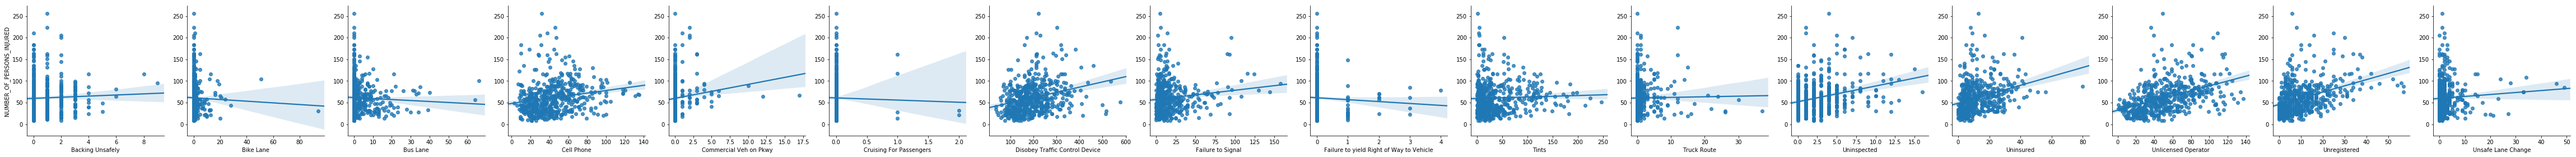

In [170]:
sns.pairplot(summons_crash, x_vars=features1, y_vars='NUMBER_OF_PERSONS_INJURED', size = 4, kind='reg');

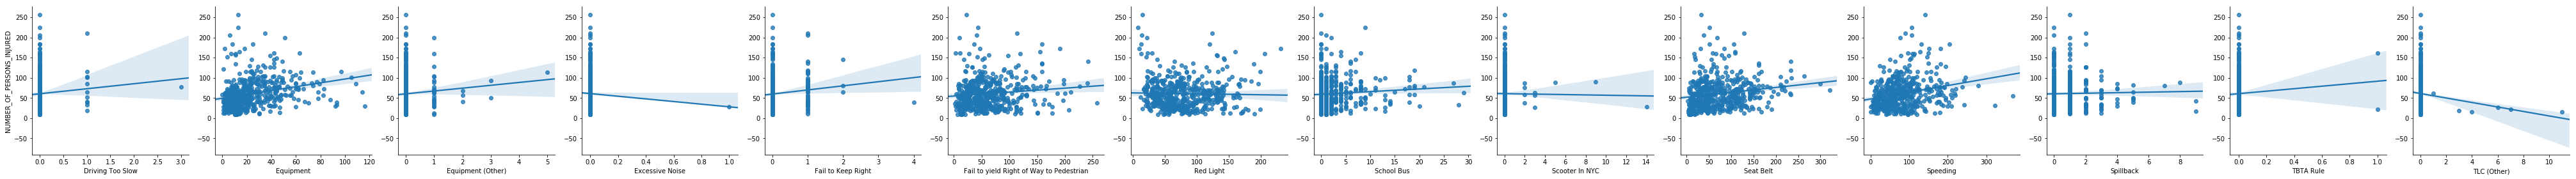

In [171]:
sns.pairplot(summons_crash, x_vars=features2, y_vars='NUMBER_OF_PERSONS_INJURED', size = 4, kind='reg');

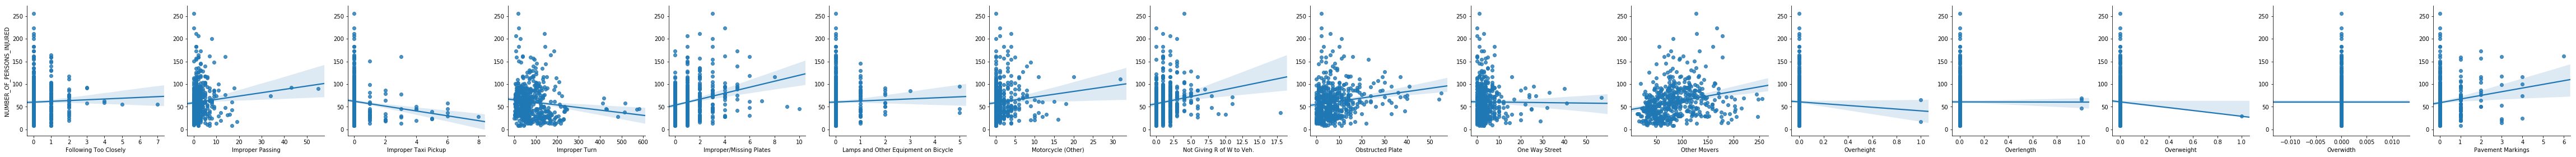

In [172]:
sns.pairplot(summons_crash, x_vars=features3, y_vars='NUMBER_OF_PERSONS_INJURED', size = 4, kind='reg');

In [173]:
# Run Random Forest to help in feature selection
select = RFE(RandomForestClassifier(n_estimators = 100), n_features_to_select=7)

In [174]:
X = summons_crash[all_features]
y = summons_crash.NUMBER_OF_PERSONS_INJURED

In [175]:
select.fit(X, y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [176]:
select.get_support() 

# True (6) = Disobey Traffic Control Device, Fail to yield Right of Way to Pedestrian, Seat Belt, Speeding, Other Movers, Improper Turn
# True (7) = added Unlicensed Operator

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False])

In [177]:
# Select features based on model
select_features = ['Disobey Traffic Control Device', 'Fail to yield Right of Way to Pedestrian', 'Seat Belt', 'Speeding', 'Other Movers', 'Improper Turn','Unlicensed Operator']
X_select = summons_crash[select_features]

In [178]:
summons_crash.sum().sort_values(ascending=False)

# features selected are generally the ones with most data points
# when adding 7th feature, I expected red light, but go unlicenced operator with significantly less data

Disobey Traffic Control Device              98712
Other Movers                                43128
Improper Turn                               41216
Speeding                                    40667
Red Light                                   40171
Seat Belt                                   37636
Fail to yield Right of Way to Pedestrian    31470
NUMBER_OF_PERSONS_INJURED                   30980
Unlicensed Operator                         25850
NUMBER_OF_MOTORIST_INJURED                  23358
Cell Phone                                  21819
Tints                                       19692
Equipment                                   12224
Failure to Signal                            8481
Uninsured                                    6005
Unregistered                                 5371
NUMBER_OF_PEDESTRIANS_INJURED                5283
Obstructed Plate                             4045
NUMBER_OF_CYCLIST_INJURED                    2339
One Way Street                               2100


In [179]:
# Create a function to run a Linear Regression model with train/test split and output the RMSE and Coefficient 
def train_test_rmse(summons_crash, testfeatures):
    X = summons_crash[testfeatures]
    y = summons_crash.NUMBER_OF_PERSONS_INJURED
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return "RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "Coef:", linreg.coef_ 

In [180]:
# Run LR model with different features

print(train_test_rmse(summons_crash, ['Disobey Traffic Control Device', 'Fail to yield Right of Way to Pedestrian', 'Seat Belt']))
print(train_test_rmse(summons_crash, ['Speeding', 'Other Movers', 'Improper Turn','Unlicensed Operator']))
print(train_test_rmse(summons_crash, ['Disobey Traffic Control Device','Other Movers', 'Improper Turn']))
print(train_test_rmse(summons_crash, ['Disobey Traffic Control Device', 'Fail to yield Right of Way to Pedestrian', 'Seat Belt', 'Speeding', 'Other Movers', 'Improper Turn','Unlicensed Operator']))
print(train_test_rmse(summons_crash, ['Fail to Keep Right','Failure to yield Right of Way to Vehicle', 'Scooter In NYC'])) 

# not much RMSE difference when selecting features that weren't identified in Random Forest and have low counts (last line)
# try with stats model package, try regularize and B Ridge

('RMSE:', 31.34689485988675, 'Coef:', array([0.10460353, 0.04264591, 0.10139185]))
('RMSE:', 29.97544641005372, 'Coef:', array([ 0.01976964,  0.13866132, -0.00106541,  0.49329482]))
('RMSE:', 31.054887880250565, 'Coef:', array([ 0.11568899,  0.21306453, -0.04880737]))
('RMSE:', 29.29689968996503, 'Coef:', array([ 0.03761448,  0.10888516, -0.05347733,  0.00908428,  0.15398652,
       -0.03197452,  0.46144005]))
('RMSE:', 33.39727387973651, 'Coef:', array([11.45246127, -4.15407552, -2.16864959]))


In [181]:
# Clustering model 

select_features = ['Disobey Traffic Control Device', 'Fail to yield Right of Way to Pedestrian', 'Seat Belt', 'Speeding', 'Other Movers', 'Improper Turn','Unlicensed Operator']
XK = summons_crash[select_features]

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(XK)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [182]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [183]:
metrics.silhouette_score(XK, labels, metric='euclidean')
# 2 clusters is 0.23746278125219747
# 3 clusters is 0.22630885051714666
# 4 clusters is 0.2134799434368354

0.2382073255622588

In [184]:
summons_crash['label'] = labels
summons_crash.head()

,Backing Unsafely,Bike Lane,Bus Lane,Cell Phone,Commercial Veh on Pkwy,Cruising For Passengers,Disobey Traffic Control Device,Driving Too Slow,Equipment,Equipment (Other),Excessive Noise,Fail to Keep Right,Fail to yield Right of Way to Pedestrian,Failure to Signal,Failure to yield Right of Way to Vehicle,Following Too Closely,Improper Passing,Improper Taxi Pickup,Improper Turn,Improper/Missing Plates,Lamps and Other Equipment on Bicycle,Motorcycle (Other),Not Giving R of W to Veh.,Obstructed Plate,One Way Street,Other Movers,Overheight,Overlength,Overweight,Overwidth,Pavement Markings,Red Light,School Bus,Scooter In NYC,Seat Belt,Speeding,Spillback,TBTA Rule,TLC (Other),Tints,Truck Route,Uninspected,Uninsured,Unlicensed Operator,Unregistered,Unsafe Lane Change,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,label
PCT_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April 100th Precinct,0,0,0,31,0,0,111,0,10,0,0,0,10,10,0,1,8,0,7,0,0,0,0,8,7,82,0,0,0,0,0,53,4,0,15,74,1,0,0,12,0,3,7,37,7,4,24,0,4,0,2,0,18,0,0
April 101st Precinct,0,1,0,19,0,0,105,1,12,0,0,0,10,4,0,0,3,0,43,0,0,0,0,6,0,61,0,0,0,0,0,58,2,0,4,55,2,0,0,15,0,3,6,41,10,0,19,1,7,1,3,0,9,0,0
April 102nd Precinct,1,0,9,50,0,0,145,0,66,0,0,0,56,10,0,0,4,0,69,0,0,4,1,10,2,81,0,0,0,0,0,65,0,0,112,55,1,0,0,12,1,4,15,61,13,1,72,0,16,0,3,0,53,0,0
April 103rd Precinct,2,0,35,37,0,0,191,0,17,0,0,0,83,3,0,0,0,0,128,1,0,0,0,4,2,115,0,0,0,0,0,108,0,0,68,100,0,0,0,0,0,0,6,41,1,0,86,0,14,0,5,0,67,0,0
April 104th Precinct,2,3,2,54,0,0,188,0,43,0,0,1,102,5,0,0,1,0,22,1,0,0,0,19,0,108,0,0,0,0,0,80,0,0,80,170,5,0,0,100,9,8,22,98,28,0,82,0,13,0,6,0,63,0,0


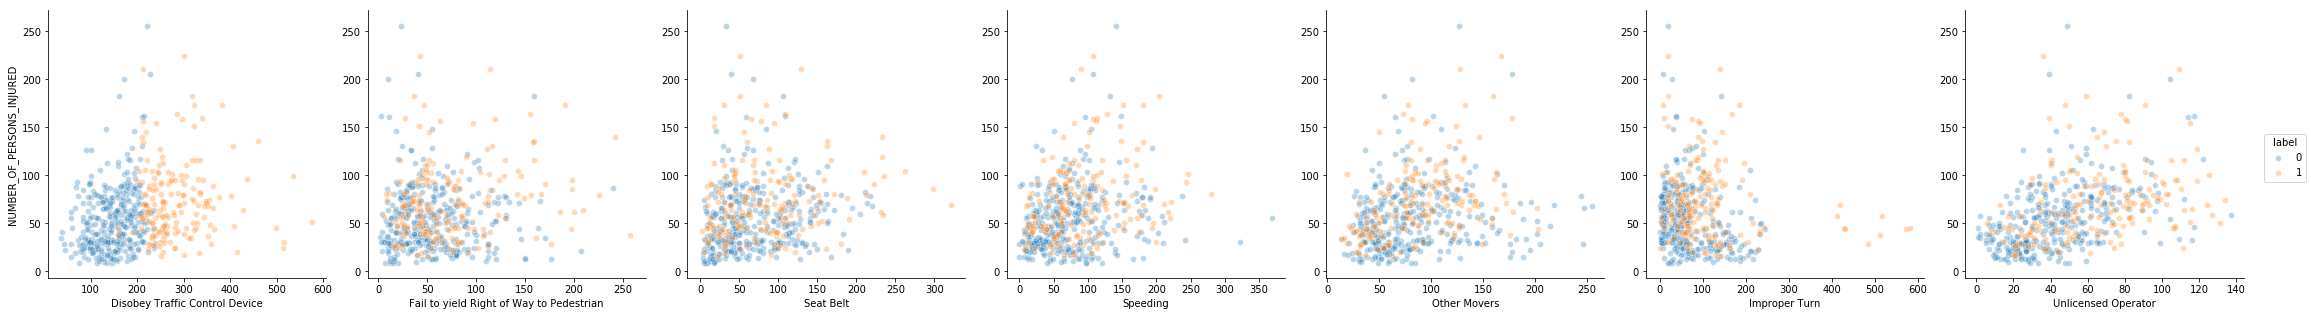

In [185]:
cols = select_features
sns.pairplot(summons_crash, x_vars=cols, y_vars= 'NUMBER_OF_PERSONS_INJURED', size = 4.5, hue='label', plot_kws={'alpha':0.3})

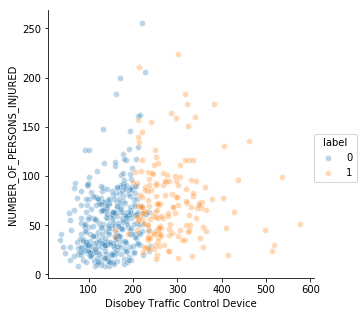

In [186]:
sns.pairplot(summons_crash, x_vars=cols[0], y_vars= 'NUMBER_OF_PERSONS_INJURED', size = 4.5, hue='label', plot_kws={'alpha':0.3})